In [3]:
from new_helper_functions import walk_through_dir

In [4]:
walk_through_dir("ham10000_dataset_split")


There are 3 directories and 0 images in 'ham10000_dataset_split'.
There are 7 directories and 0 images in 'ham10000_dataset_split\test'.
There are 0 directories and 49 images in 'ham10000_dataset_split\test\akiec'.
There are 0 directories and 77 images in 'ham10000_dataset_split\test\bcc'.
There are 0 directories and 165 images in 'ham10000_dataset_split\test\bkl'.
There are 0 directories and 17 images in 'ham10000_dataset_split\test\df'.
There are 0 directories and 167 images in 'ham10000_dataset_split\test\mel'.
There are 0 directories and 1006 images in 'ham10000_dataset_split\test\nv'.
There are 0 directories and 22 images in 'ham10000_dataset_split\test\vasc'.
There are 7 directories and 0 images in 'ham10000_dataset_split\train'.
There are 0 directories and 229 images in 'ham10000_dataset_split\train\akiec'.
There are 0 directories and 360 images in 'ham10000_dataset_split\train\bcc'.
There are 0 directories and 769 images in 'ham10000_dataset_split\train\bkl'.
There are 0 direct

In [5]:
train_dir = 'C:\\Users\\vaibh\\OneDrive\\Desktop\\Skin-Cancer-Detection\\ham10000_dataset_split\\train'
test_dir = 'C:\\Users\\vaibh\\OneDrive\\Desktop\\Skin-Cancer-Detection\\ham10000_dataset_split\\test'
val_dir = 'C:\\Users\\vaibh\\OneDrive\\Desktop\\Skin-Cancer-Detection\\ham10000_dataset_split\\val'


In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_data = image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_data = image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)


Found 7010 files belonging to 7 classes.
Found 1503 files belonging to 7 classes.
Found 1502 files belonging to 7 classes.


In [7]:
class_names = train_data.class_names
class_names

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

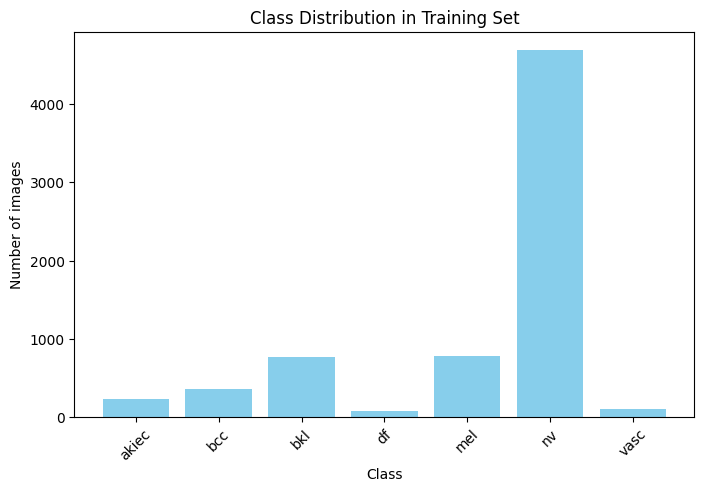

In [8]:
# Visualize class distribution
import matplotlib.pyplot as plt
import numpy as np
class_counts = {class_name: 0 for class_name in class_names}
for _, labels in train_data:
    for label in labels.numpy():
        class_counts[class_names[label]] += 1
plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=45)
plt.show()

# Visualizing the Dataset

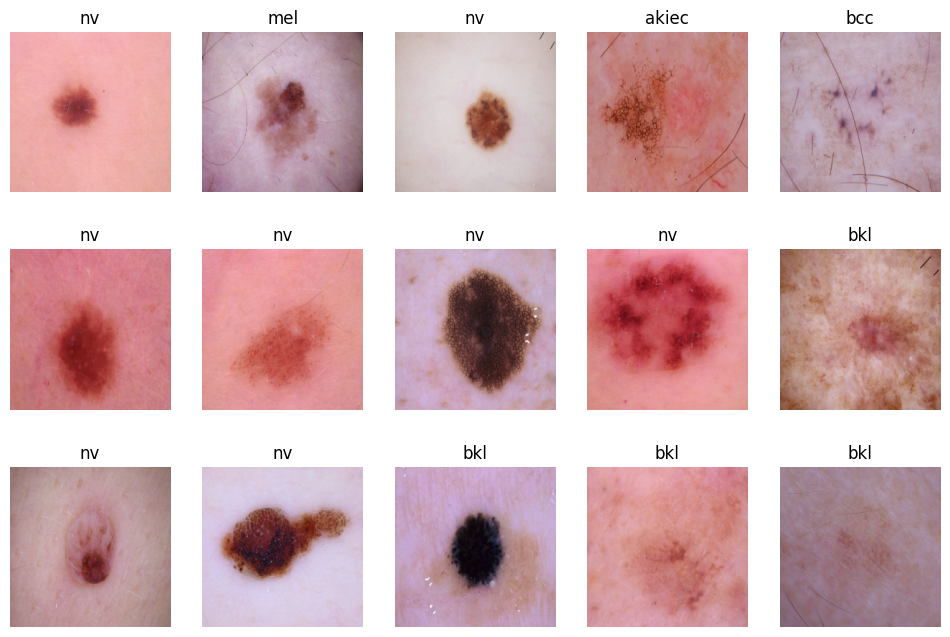

In [9]:
plt.figure(figsize=(12, 8))
for images, labels in train_data.take(1):
	for i in range(15): # show 15 images
		ax = plt.subplot(3, 5, i+1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title(class_names[labels[i]])
		plt.axis("off")
plt.show()

# Data Augmentation

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.3)
])

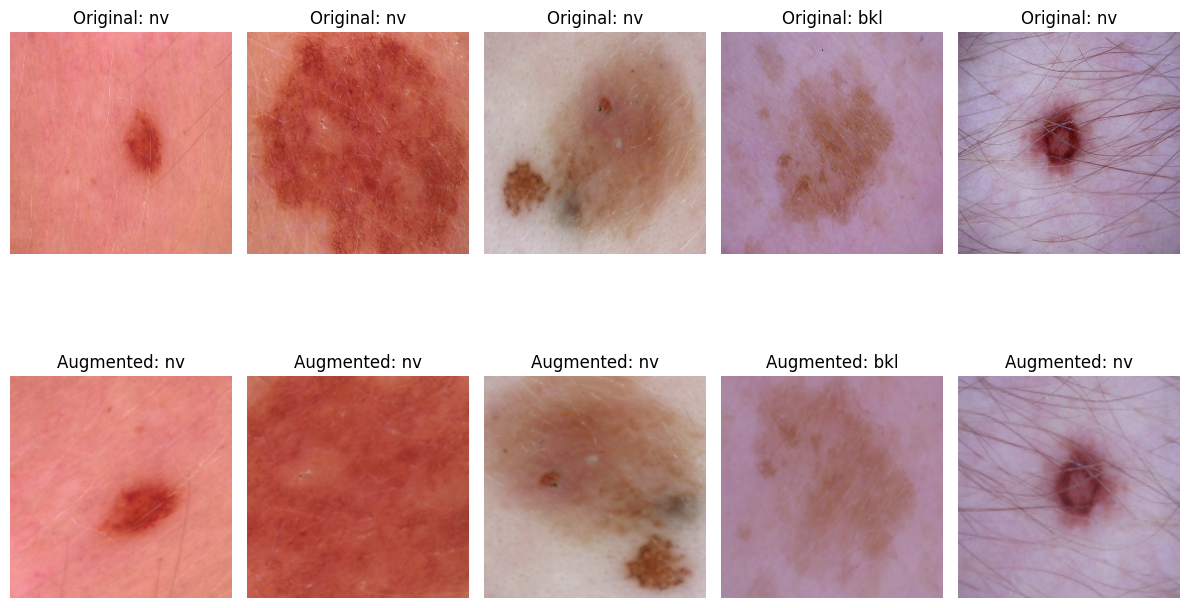

In [24]:
# Visualize augmented images
import tensorflow as tf
plt.figure(figsize=(12,8))
for images, labels in train_data.take(1):
    for i in range(5): # show 5 original and augmented images
        # Display original image
        ax = plt.subplot(2, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Original: {class_names[labels[i]]}")
        plt.axis("off")
        
        # Display augmented image
        augmented_img = data_augmentation(tf.expand_dims(images[i],0))[0]
        ax = plt.subplot(2, 5, i+6)
        plt.imshow(augmented_img.numpy().astype("uint8"))
        plt.title(f"Augmented: {class_names[labels[i]]}")
        plt.axis("off")
plt.tight_layout()  
plt.show()

# Model 1 Baseline Model 
* using the CNN explainer Architecture

In [30]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential()
model_1.add(layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
model_1.add(data_augmentation)  # Add data augmentation layer
model_1.add(layers.Rescaling(1./255))  # Add rescaling layer to normalize pixel values
model_1.add(Conv2D(32, 3, activation='relu'))
model_1.add(MaxPool2D(pool_size=2))
model_1.add(Conv2D(32, 3, activation='relu'))
model_1.add(Conv2D(32, 3, activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(7, activation='softmax'))

In [31]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 107, 107, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 366368)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    46,895,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,915,527 (178.97 MB)

 Trainable params: 46,915,527 (178.97 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Before Rescaling

In [29]:
history_1 = model_1.fit(train_data, validation_data=val_data, epochs=2)


Epoch 1/2
220/220 ━━━━━━━━━━━━━━━━━━━━ 109s 489ms/step - accuracy: 0.5912 - loss: 171.6268 - val_accuracy: 0.6691 - val_loss: 1.1612
Epoch 2/2
220/220 ━━━━━━━━━━━━━━━━━━━━ 102s 462ms/step - accuracy: 0.6643 - loss: 1.1575 - val_accuracy: 0.6691 - val_loss: 1.1249


After Rescaling

In [35]:
from new_helper_functions import plot_loss_curves

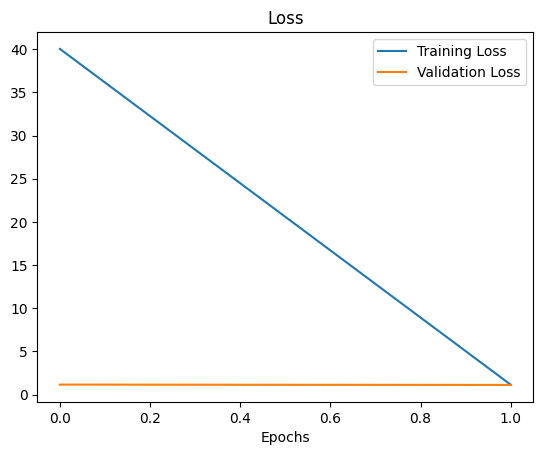

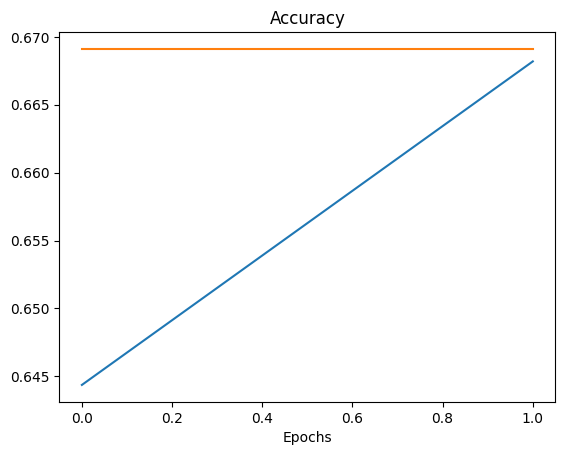

In [36]:
plot_loss_curves(history_1)

In [33]:
history_baseline_model_1 = model_1.fit(train_data, validation_data=val_data, epochs=2)


Epoch 1/2
220/220 ━━━━━━━━━━━━━━━━━━━━ 108s 484ms/step - accuracy: 0.6359 - loss: 1.4733 - val_accuracy: 0.6844 - val_loss: 0.9645
Epoch 2/2
220/220 ━━━━━━━━━━━━━━━━━━━━ 108s 484ms/step - accuracy: 0.6359 - loss: 1.4733 - val_accuracy: 0.6844 - val_loss: 0.9645
Epoch 2/2
220/220 ━━━━━━━━━━━━━━━━━━━━ 109s 495ms/step - accuracy: 0.6721 - loss: 0.9595 - val_accuracy: 0.6758 - val_loss: 0.9784
220/220 ━━━━━━━━━━━━━━━━━━━━ 109s 495ms/step - accuracy: 0.6721 - loss: 0.9595 - val_accuracy: 0.6758 - val_loss: 0.9784


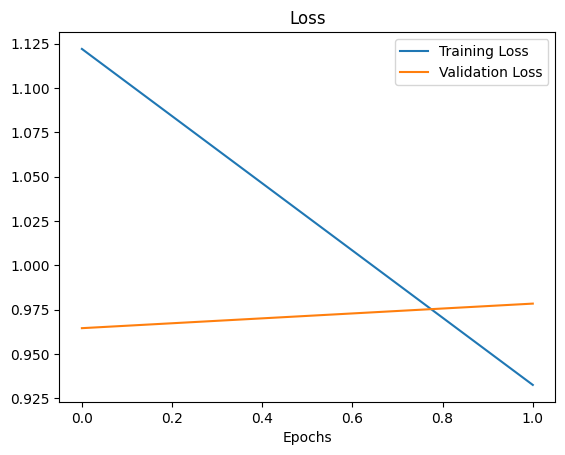

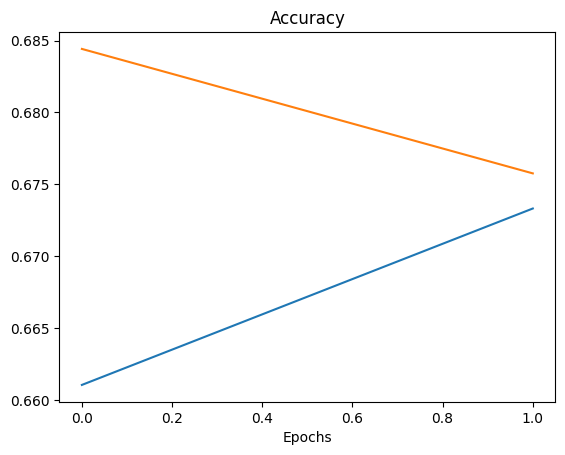

In [37]:
plot_loss_curves(history_baseline_model_1)